In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [45]:
df.shape

(3484, 18)

In [46]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,the new crpf apartments,sector 9,0.75,5814.0,3.0,3.0,3,6.0,Old Property,1433.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0
1,house,dlf city plots,sector 26,17.30,38737.0,6.0,7.0,3+,3.0,New Property,4518.0,1.0,1.0,1.0,1.0,0.0,2.0,124.0
2,flat,emaar gurgaon greens,sector 102,1.52,9212.0,3.0,3.0,3,7.0,Relatively New,1315.0,0.0,1.0,0.0,0.0,0.0,2.0,137.0
3,house,not applicable,sector 4,0.40,9259.0,1.0,1.0,1,1.0,Moderately Old,432.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,flat,bptp terra,sector 37,1.17,8298.0,2.0,2.0,2,0.0,Relatively New,1276.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0


In [48]:
latlong = pd.read_csv('latlong.csv')
latlong.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [49]:
import pandas as pd
import re

# Step 1: Load the data
latlong = pd.read_csv("latlong.csv")  # Replace with your file

# Step 2: Filter valid sectors (pure numbers or non-sector names)
latlong['sector'] = latlong['sector'].astype(str)

def is_valid_sector(sector):
    return bool(re.match(r'^sector \d+$', sector)) or not sector.startswith('sector')

latlong = latlong[latlong['sector'].apply(is_valid_sector)].copy()

# Step 3: Extract latitude and longitude
latlong['latitude'] = (
    latlong['coordinates']
    .str.split(',').str[0]
    .str.extract(r'([\d.]+)')[0]
    .astype(float)
)

latlong['longitude'] = (
    latlong['coordinates']
    .str.split(',').str[1]
    .str.extract(r'([\d.]+)')[0]
    .astype(float)
)

# Step 4: (Optional) Preview the cleaned dataframe
print(latlong[['sector','coordinates','latitude', 'longitude']].head())


     sector             coordinates  latitude  longitude
0  sector 1  28.3663° N, 76.9456° E   28.3663    76.9456
1  sector 2  28.5095° N, 77.0320° E   28.5095    77.0320
2  sector 3  28.4909° N, 77.0176° E   28.4909    77.0176
3  sector 4  28.4738° N, 77.0107° E   28.4738    77.0107
4  sector 5  28.4794° N, 77.0176° E   28.4794    77.0176


In [50]:
latlong['sector'].unique()

array(['sector 1', 'sector 2', 'sector 3', 'sector 4', 'sector 5',
       'sector 6', 'sector 7', 'sector 8', 'sector 9', 'sector 10',
       'sector 11', 'sector 12', 'sector 13', 'sector 14', 'sector 15',
       'sector 16', 'sector 17', 'sector 18', 'sector 19', 'sector 20',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 29', 'sector 30',
       'sector 31', 'sector 32', 'sector 33', 'sector 34', 'sector 35',
       'sector 36', 'sector 37', 'sector 38', 'sector 39', 'sector 40',
       'sector 41', 'sector 42', 'sector 43', 'sector 44', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector 59', 'sector 60',
       'sector 61', 'sector 62', 'sector 63', 'sector 64', 'sector 65',
       'sector 66', 'sector 67', 'sector 68', 'sector 69', 'sector 70',
 

In [51]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [52]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [53]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [54]:
new_df = df.merge(latlong, on='sector')

In [55]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [56]:
group_df = new_df.groupby('sector')[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()

In [57]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,1.841667,10576.333333,1921.000000,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.939900,5971.680000,1569.081800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [58]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [59]:
new_df.to_csv('data_viz1.csv',index=False)

In [63]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [64]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 9A Gurgaon,flat,the new crpf apartments,0.75,5813.0,1290.0,Carpet area: 1290 (119.84 sq.m.),3,3,3,pooja room,"Sector 9A Gurgaon, Gurgaon, Haryana",6.0,East,10+ Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Esic...","3bhk, 1590 sqft builtup, 3 bedroom, 3 bathroom...",NaN,"['Water Storage', 'No open drainage around', '...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
1,6 Bedroom House for sale in DLF Phase 1,house,dlf city plots,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,"pooja room,store room,study room,servant room","Brand New Deal, DLF Phase 1, Gurgaon, Haryana",3.0,North,0 to 1 Year Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacar...",North facing\nCorner property\nBest scenic ara...,"['1 Exhaust Fan', '6 Geyser', '8 AC', '1 Modul...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
2,3 BHK Flat in Sector 102 Gurgaon,flat,emaar gurgaon greens,1.52,9212.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,servant room,"Multiple Options Available, Sector 102 Gurgaon...",7.0,North-West,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway'...",High roi investment - Unused luxury 3bhk on dw...,"['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction4 out of..."
3,1 Bedroom House for sale in Laxman Vihar,house,not applicable,0.40,9259.0,432.0,Plot area 432(40.13 sq.m.),1,1,1,not available,"Laxman Vihar, Gurgaon, Haryana",1.0,NaN,5 to 10 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Prat...",Looking for buyer to purchase our house/villa ...,[],NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
4,2 BHK Flat in Sector 37D Gurgaon,flat,bptp terra,1.17,8297.0,1410.0,Super Built up area 1410(130.99 sq.m.),2,2,2,not available,"Sector 37D Gurgaon, Gurgaon, Haryana",0.0,North-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...",This beautiful 2 bhk flat in sector 37d gurgao...,"['1 Chimney', '2 AC', 'No Bed', 'No Curtains',...","['Security / Fire Alarm', 'Power Back-up', 'Li...","['Green Area4.5 out of 5', 'Construction4.5 ou..."


In [65]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [68]:
wordcloud_df.head()

,features,sector
0,"[Water Storage, No open drainage around, Park,...",sector 9
1,"[Feng Shui / Vaastu Compliant, Private Garden ...",sector 26
2,"[Security / Fire Alarm, Feng Shui / Vaastu Com...",sector 102
3,NaN,sector 4
4,"[Security / Fire Alarm, Power Back-up, Lift(s)...",sector 37


In [67]:
import pandas as pd
import ast

# Step 1: Merge df1 and df to create wordcloud_df
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features', 'sector']]

# Step 2: Safely convert stringified lists to actual Python lists
wordcloud_df['features'] = wordcloud_df['features'].dropna().apply(ast.literal_eval)

# Step 3: Group by sector and aggregate features
sector_wise_features = wordcloud_df.groupby('sector')['features'].sum()

# Step 4: Preview the result
for sector, features in sector_wise_features.items():
    print(f"\nSector: {sector}")
    print(features)



Sector: dwarka expressway
['Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Security Personnel', 'Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Mainte

In [69]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [105]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [70]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

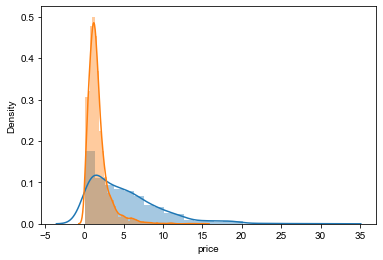

In [111]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [150]:
new_df['sector'].unique().tolist().insert(0,'overall')